Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1 Score: 0.9859


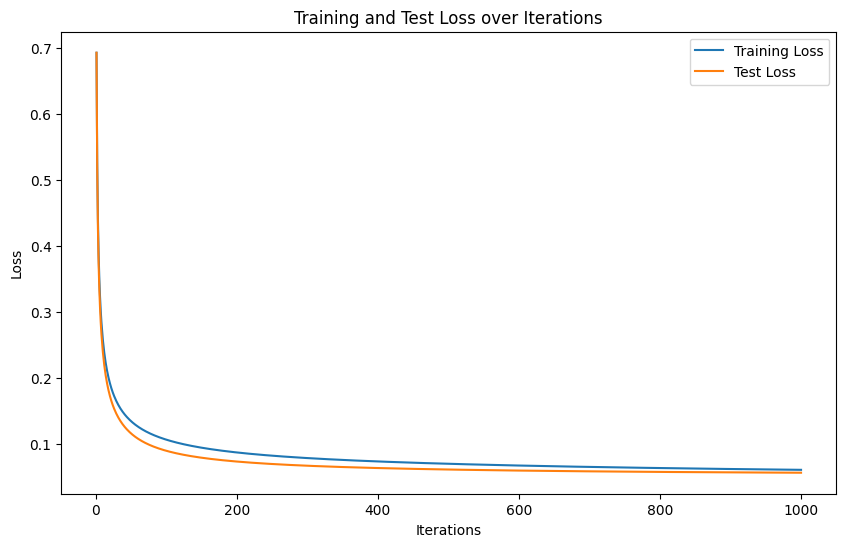

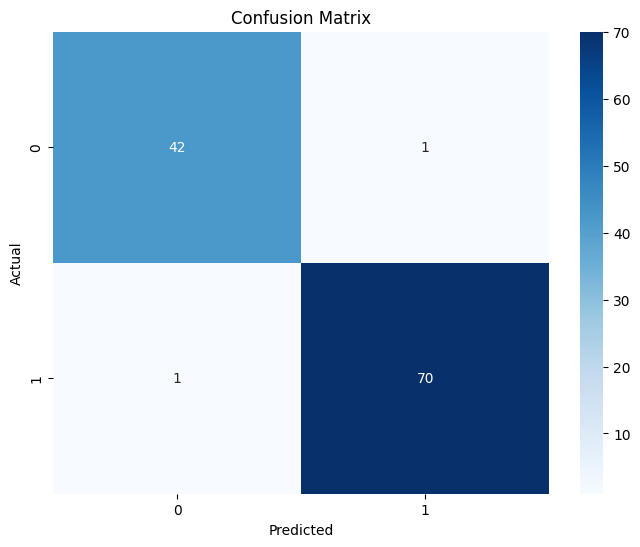

In [20]:
## PROBLEM 1 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        train_losses = []
        val_losses = []

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute train loss
            train_loss = self.compute_loss(X, y)
            train_losses.append(train_loss)

            # Compute validation loss
            val_loss = self.compute_loss(X_val, y_val)
            val_losses.append(val_loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return train_losses, val_losses

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted >= 0.5).astype(int)

# Load the cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
train_losses, test_losses = model.fit(X_train_scaled, y_train, X_test_scaled, y_test)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot training and test loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.title('Training and Test Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Weight Penalty: 0
Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1 Score: 0.9859
Final Loss: 0.0613
L2 Norm of Weights: 3.1820


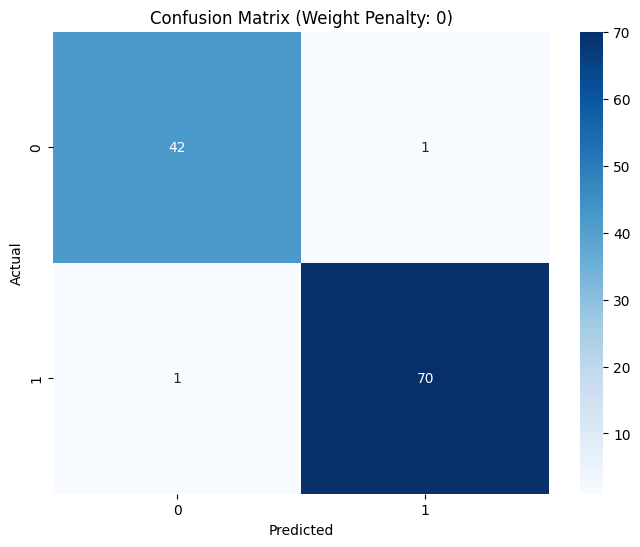

Weight Penalty: 0.1
Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1 Score: 0.9859
Final Loss: 0.0627
L2 Norm of Weights: 3.1516


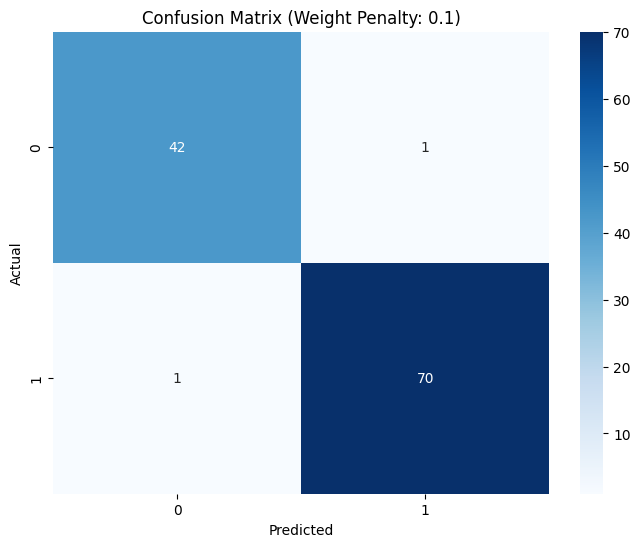

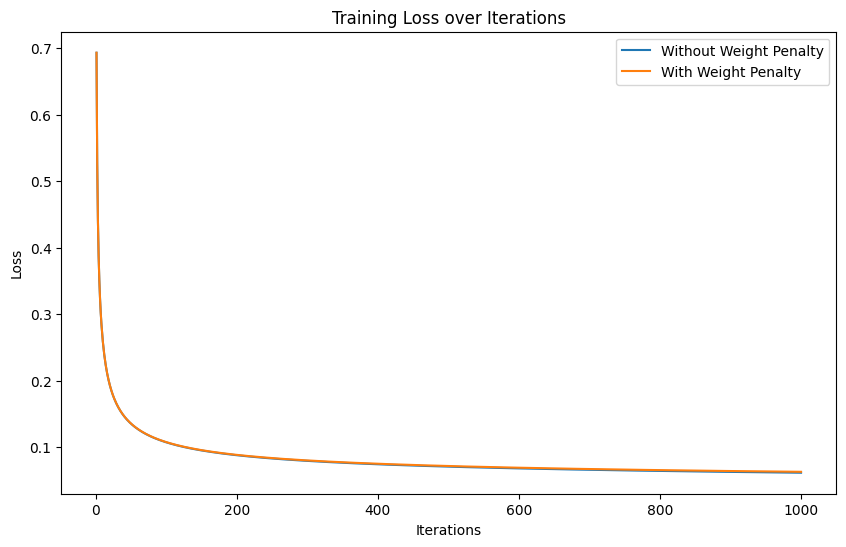

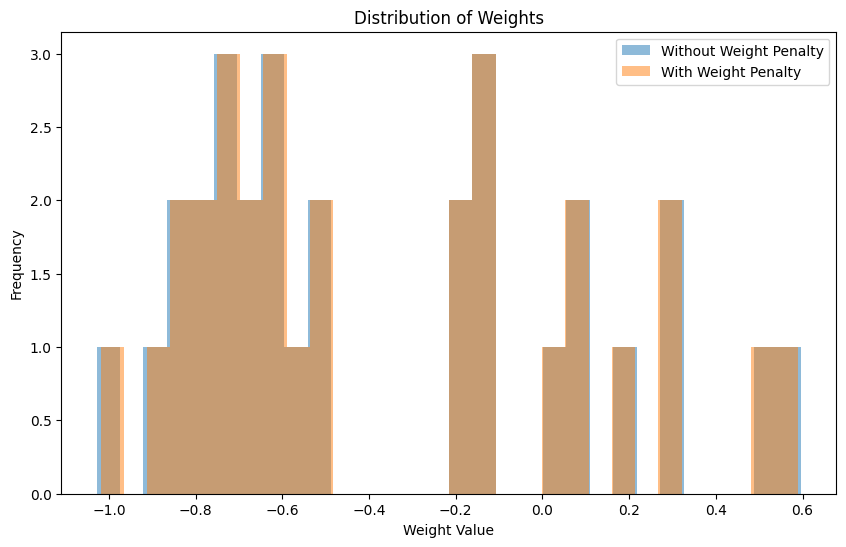

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, weight_penalty=0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight_penalty = weight_penalty
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Clip to avoid overflow

    def compute_loss(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        loss = -np.mean(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
        if self.weight_penalty > 0:
            loss += (self.weight_penalty / (2 * X.shape[0])) * np.sum(self.weights**2)
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        losses = []

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute loss
            loss = self.compute_loss(X, y)
            losses.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Add weight penalty gradient
            if self.weight_penalty > 0:
                dw += (self.weight_penalty / n_samples) * self.weights

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return losses

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted >= 0.5).astype(int)

def train_and_evaluate(X, y, weight_penalty=0):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the logistic regression model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000, weight_penalty=weight_penalty)
    losses = model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Weight Penalty: {weight_penalty}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Final Loss: {losses[-1]:.4f}")
    print(f"L2 Norm of Weights: {np.linalg.norm(model.weights):.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Weight Penalty: {weight_penalty})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return losses, model.weights

# Load the cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Question 1: Without weight penalty
losses_without_penalty, weights_without_penalty = train_and_evaluate(X, y)

# Question 2: With weight penalty
losses_with_penalty, weights_with_penalty = train_and_evaluate(X, y, weight_penalty=0.1)

# Plot training loss for both models
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses_without_penalty) + 1), losses_without_penalty, label='Without Weight Penalty')
plt.plot(range(1, len(losses_with_penalty) + 1), losses_with_penalty, label='With Weight Penalty')
plt.title('Training Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot weight distributions
plt.figure(figsize=(10, 6))
plt.hist(weights_without_penalty, bins=30, alpha=0.5, label='Without Weight Penalty')
plt.hist(weights_with_penalty, bins=30, alpha=0.5, label='With Weight Penalty')
plt.title('Distribution of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Naive Bayes Model Results:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


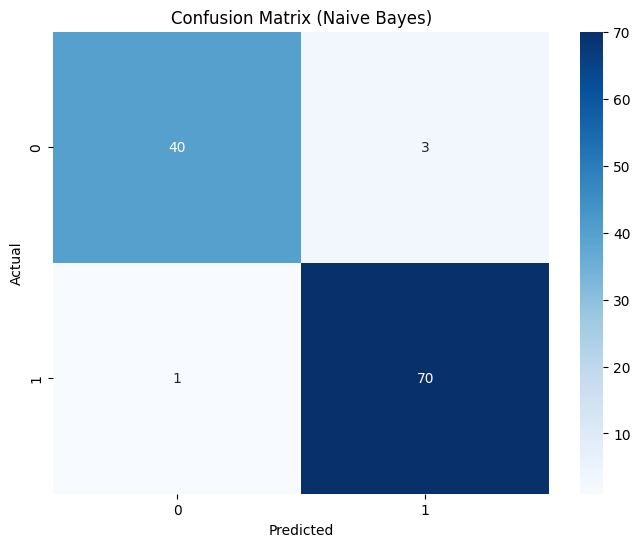

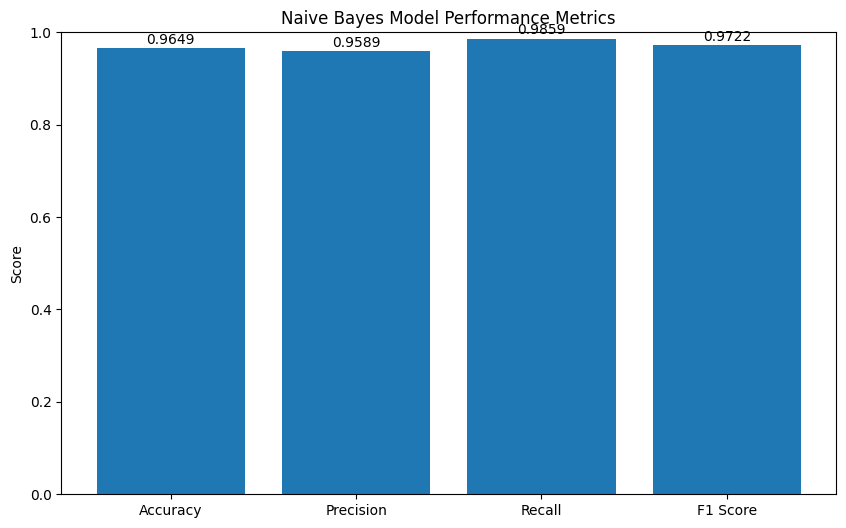

In [22]:
## Problem 3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Load the cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Naive Bayes Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.title('Naive Bayes Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

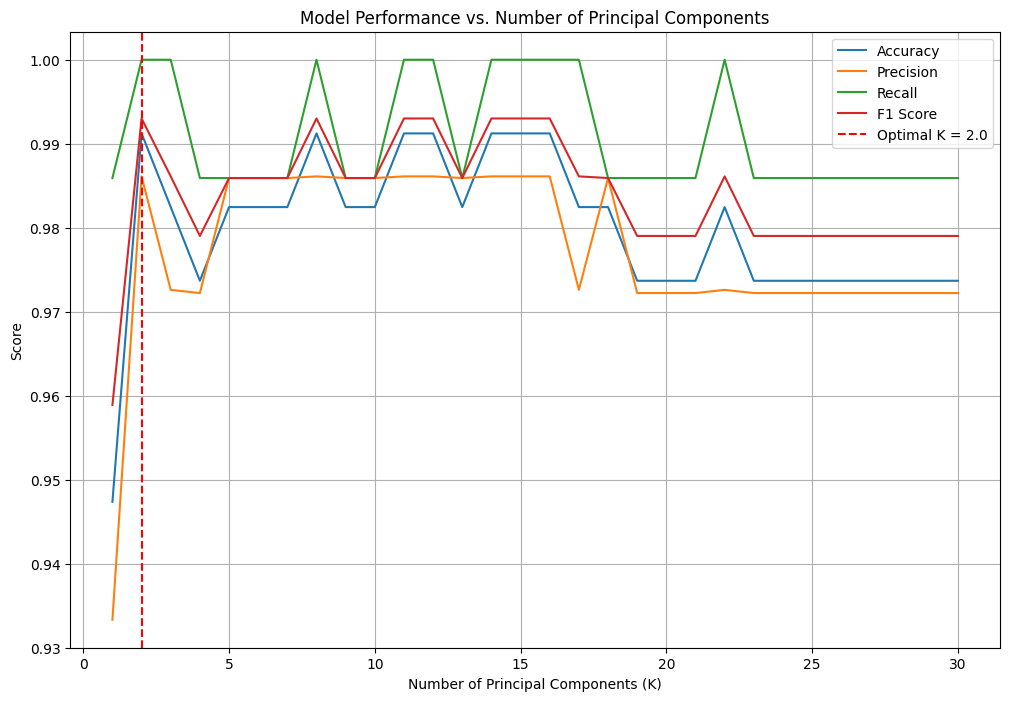

Optimal number of principal components: 2.0
Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
F1 Score: 0.9930


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the model for a given number of components
def train_and_evaluate(n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    model = LogisticRegression(random_state=42)
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

# Iterate through different numbers of principal components
max_components = X_train.shape[1]
results = []

for k in range(1, max_components + 1):
    accuracy, precision, recall, f1 = train_and_evaluate(k)
    results.append((k, accuracy, precision, recall, f1))

# Convert results to numpy array for easier manipulation
results = np.array(results)

# Find the optimal number of components (highest accuracy)
optimal_k = results[np.argmax(results[:, 1])][0]

# Plot the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, start=1):
    plt.plot(results[:, 0], results[:, i], label=metric)

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal results
optimal_results = results[np.argmax(results[:, 1])]
print(f"Optimal number of principal components: {optimal_k}")
print(f"Accuracy: {optimal_results[1]:.4f}")
print(f"Precision: {optimal_results[2]:.4f}")
print(f"Recall: {optimal_results[3]:.4f}")
print(f"F1 Score: {optimal_results[4]:.4f}")

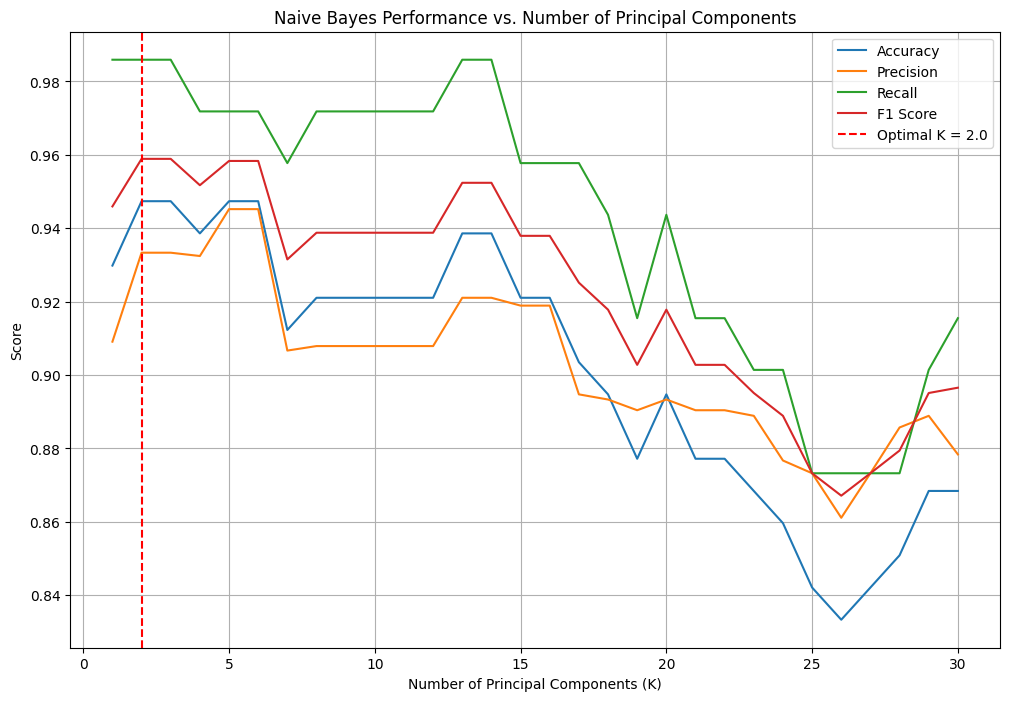

Optimal number of principal components: 2.0
Accuracy: 0.9474
Precision: 0.9333
Recall: 0.9859
F1 Score: 0.9589


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the model for a given number of components
def train_and_evaluate(n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    model = GaussianNB()
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

# Iterate through different numbers of principal components
max_components = X_train.shape[1]
results = []

for k in range(1, max_components + 1):
    accuracy, precision, recall, f1 = train_and_evaluate(k)
    results.append((k, accuracy, precision, recall, f1))

# Convert results to numpy array for easier manipulation
results = np.array(results)

# Find the optimal number of components (highest accuracy)
optimal_k = results[np.argmax(results[:, 1])][0]

# Plot the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, start=1):
    plt.plot(results[:, 0], results[:, i], label=metric)

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Naive Bayes Performance vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal results
optimal_results = results[np.argmax(results[:, 1])]
print(f"Optimal number of principal components: {optimal_k}")
print(f"Accuracy: {optimal_results[1]:.4f}")
print(f"Precision: {optimal_results[2]:.4f}")
print(f"Recall: {optimal_results[3]:.4f}")
print(f"F1 Score: {optimal_results[4]:.4f}")